### 필수과제1
- bike 데이터를 가지고 위의 보간법을 진행해 주세요.
- 실제 bike 데이터를 가지고 보간법 후에 시각화를 통해서 어떤 식으로 변화하는지를 체크해 주세요!
- 수업시간 배운 것외에 2~3가지 정도만 추가로 진행해 보시면 좋을 것 같습니다. 보간법 사용 방법 

In [1]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
bike = pd.read_csv('bike_sharing_daily.csv')

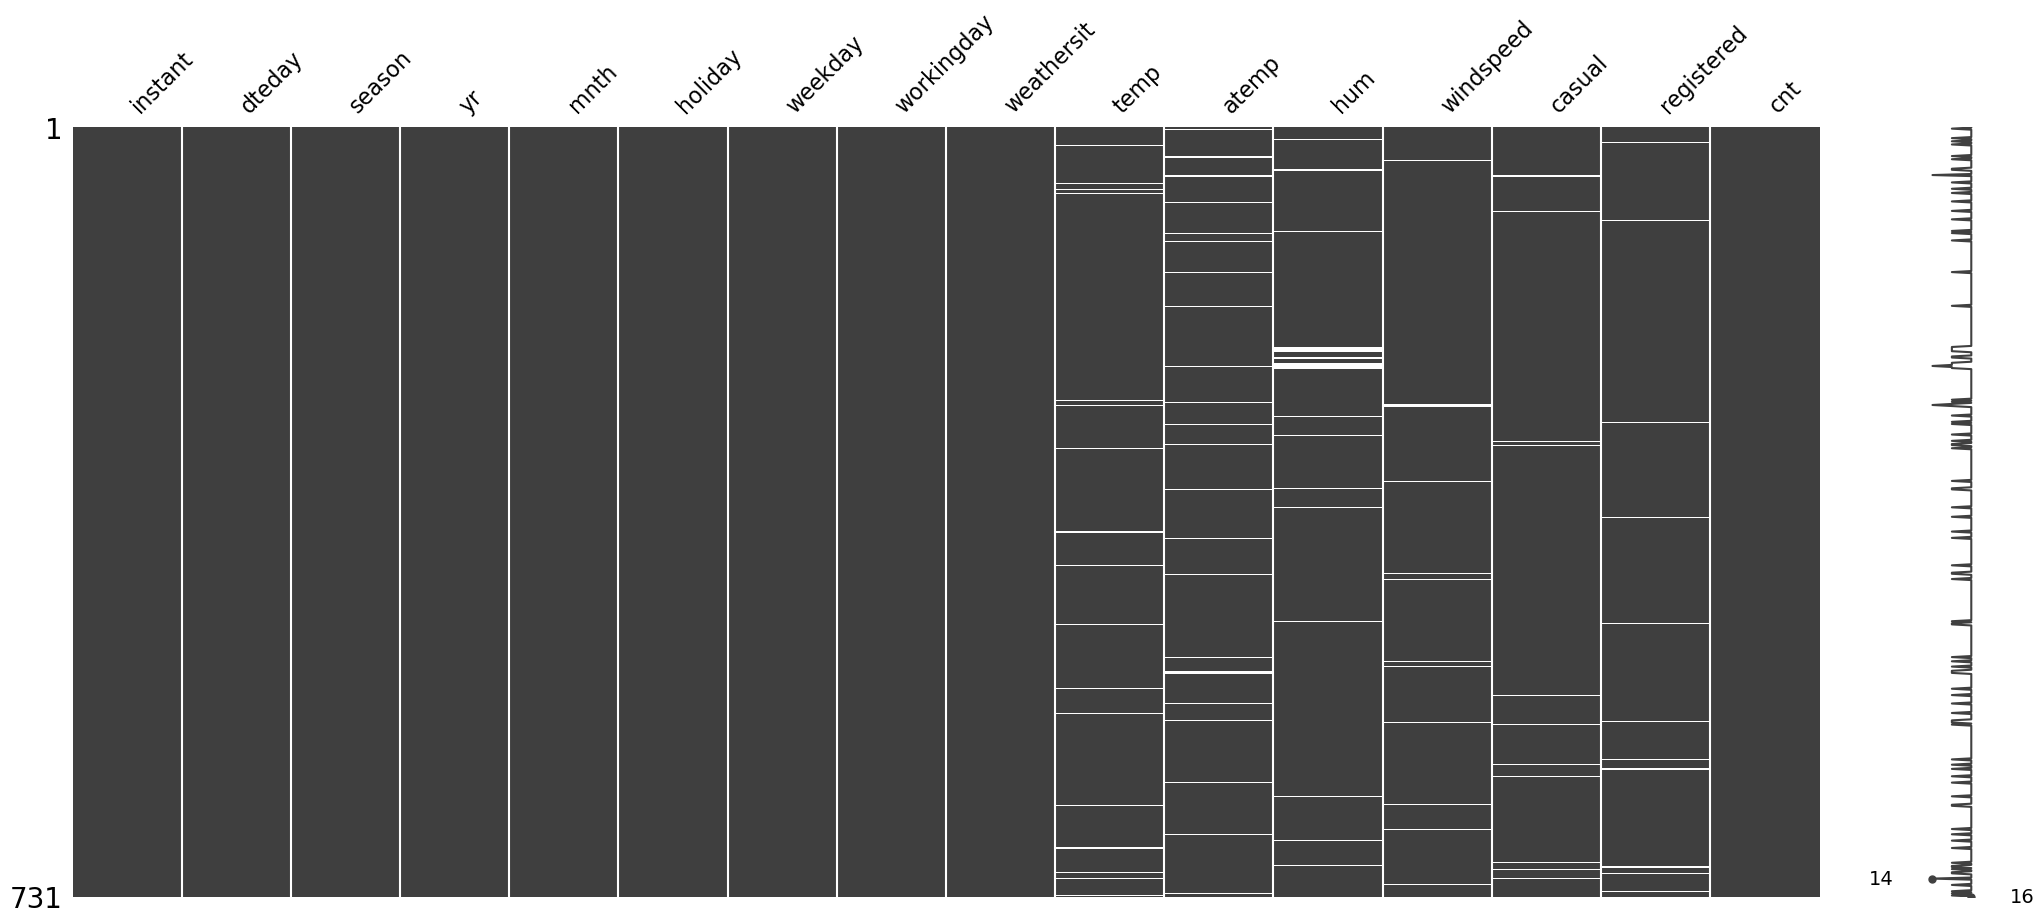

In [3]:
# 보간법 전 시각화
msno.matrix(bike)
plt.show()

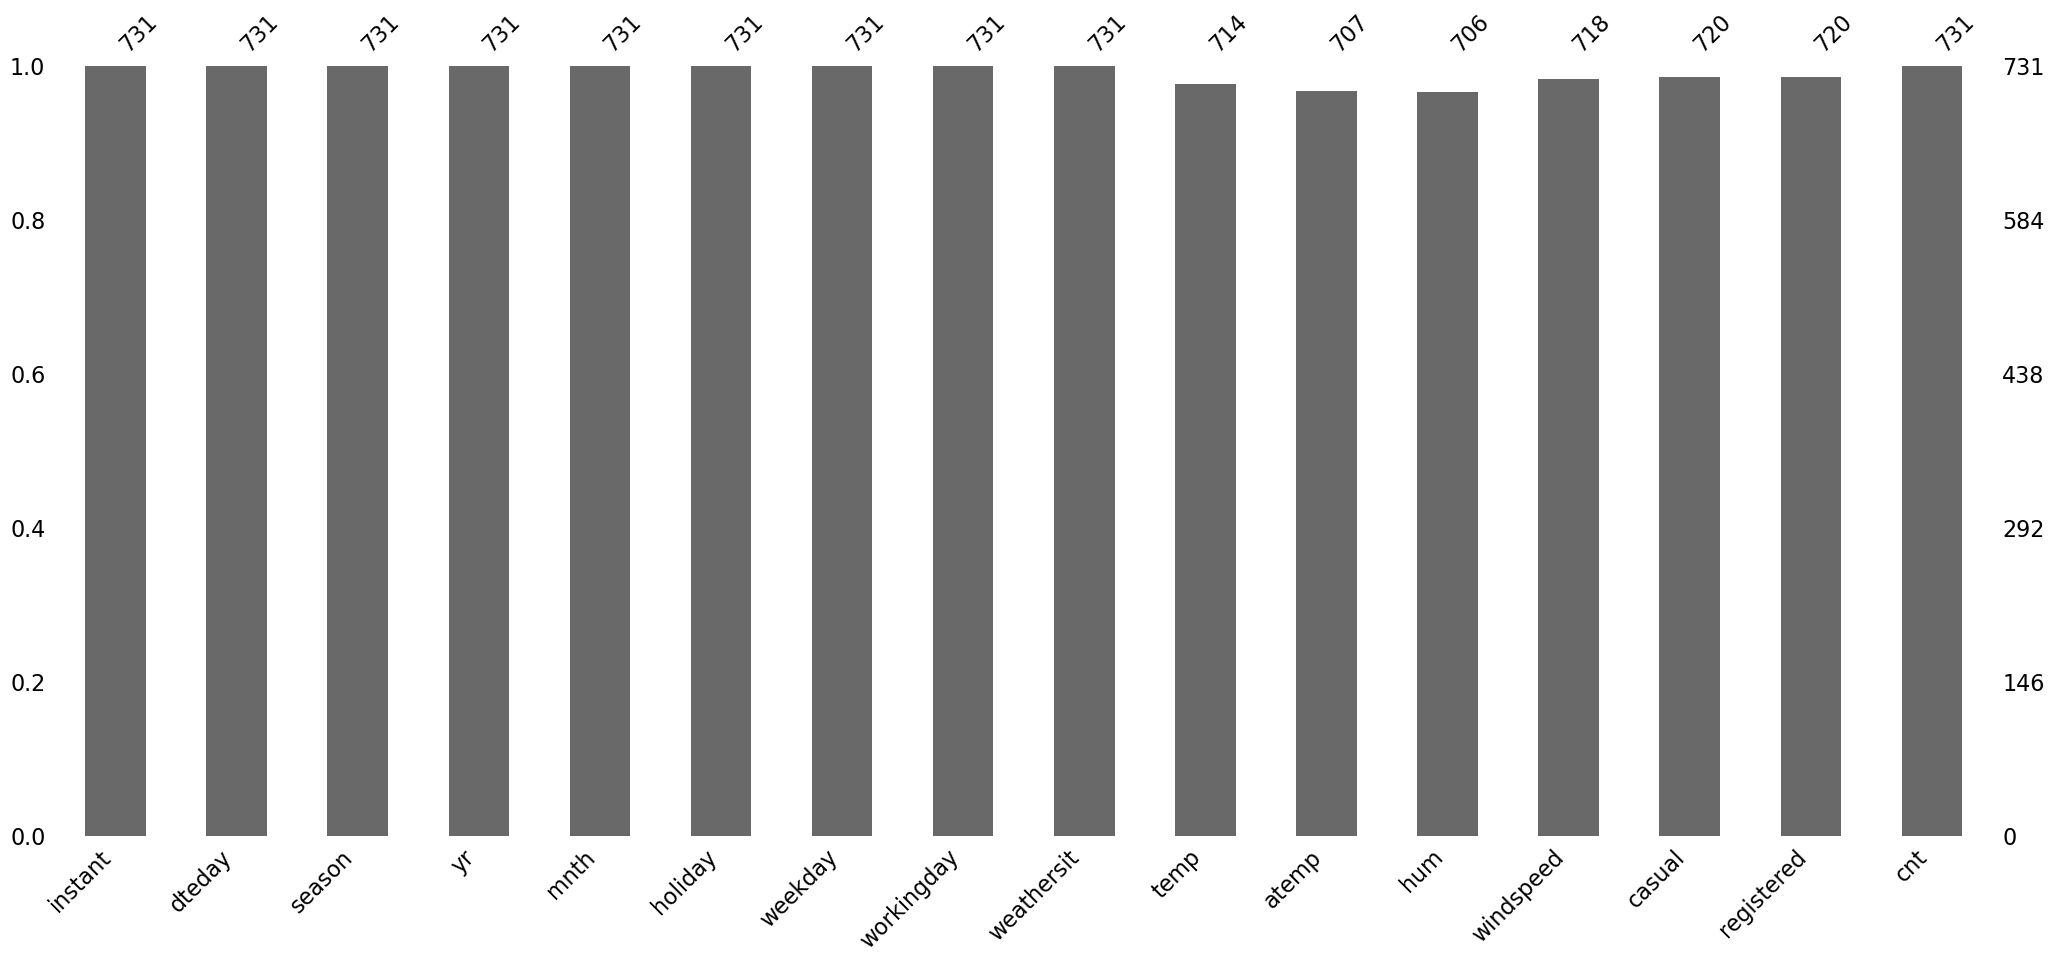

In [4]:
msno.bar(bike)
plt.show()

In [5]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [6]:
bike.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [7]:
bike[bike.isna().any(axis=1)].head(30)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
11,12,2011-01-12,1,0,1,0,3,1,1,0.172727,0.160473,NaN,0.304627,25.0,1137.0,1162
14,15,2011-01-15,1,0,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963,222.0,NaN,1248
17,18,2011-01-18,1,0,1,0,2,1,2,NaN,0.232333,0.861667,0.146775,9.0,674.0,683
28,29,2011-01-29,1,0,1,0,6,0,1,0.196522,NaN,0.651739,0.145365,123.0,975.0,1098
31,32,2011-02-01,1,0,2,0,2,1,2,0.192174,0.234530,0.829565,NaN,47.0,1313.0,1360
40,41,2011-02-10,1,0,2,0,4,1,1,0.144348,0.149548,NaN,0.221935,47.0,1491.0,1538
41,42,2011-02-11,1,0,2,0,5,1,1,0.189091,0.213509,NaN,0.108550,149.0,1597.0,1746
46,47,2011-02-16,1,0,2,0,3,1,1,0.318261,NaN,0.423478,0.251791,NaN,1897.0,2115
53,54,2011-02-23,1,0,2,0,3,1,1,NaN,0.245717,0.423043,0.094113,139.0,1778.0,1917


### bike data Interpolation

In [8]:
atemp=bike[['atemp']]
atemp

,atemp
0,0.363625
1,0.353739
2,NaN
3,0.212122
4,0.229270
...,...
726,0.226642
727,NaN
728,0.242400
729,0.231700


In [9]:
atemp=bike.iloc[0:110]['atemp']

In [10]:
atemp.isna().sum()

6

In [11]:
atemp.dropna()

0      0.363625
1      0.353739
3      0.212122
4      0.229270
5      0.233209
         ...   
104    0.441913
105    0.425492
106    0.445696
107    0.503146
109    0.564392
Name: atemp, Length: 104, dtype: float64

In [12]:
atemp.mean()

0.2975792567307693

In [13]:
atemp.fillna(0.2975792567307693).to_frame()

,atemp
0,0.363625
1,0.353739
2,0.297579
3,0.212122
4,0.229270
...,...
105,0.425492
106,0.445696
107,0.503146
108,0.297579


In [14]:
atemp.fillna(0).to_frame()

,atemp
0,0.363625
1,0.353739
2,0.000000
3,0.212122
4,0.229270
...,...
105,0.425492
106,0.445696
107,0.503146
108,0.000000


In [15]:
atemp.fillna(method='ffill').to_frame()

,atemp
0,0.363625
1,0.353739
2,0.353739
3,0.212122
4,0.229270
...,...
105,0.425492
106,0.445696
107,0.503146
108,0.503146


In [16]:
atemp.to_frame()

,atemp
0,0.363625
1,0.353739
2,NaN
3,0.212122
4,0.229270
...,...
105,0.425492
106,0.445696
107,0.503146
108,NaN


In [17]:
atemp.fillna(method='bfill').to_frame()

,atemp
0,0.363625
1,0.353739
2,0.212122
3,0.212122
4,0.229270
...,...
105,0.425492
106,0.445696
107,0.503146
108,0.564392


In [18]:
atemp.interpolate().to_frame()

,atemp
0,0.363625
1,0.353739
2,0.282931
3,0.212122
4,0.229270
...,...
105,0.425492
106,0.445696
107,0.503146
108,0.533769


<AxesSubplot:>

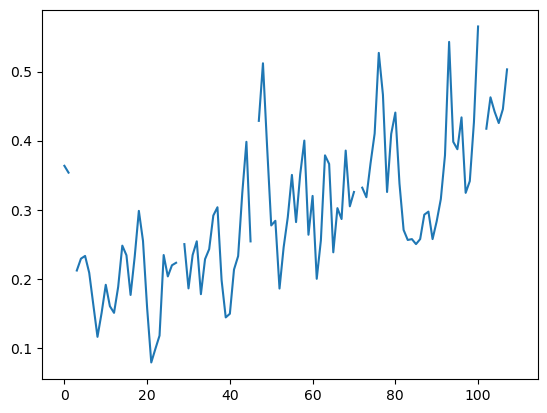

In [19]:
atemp.plot()

<AxesSubplot:>

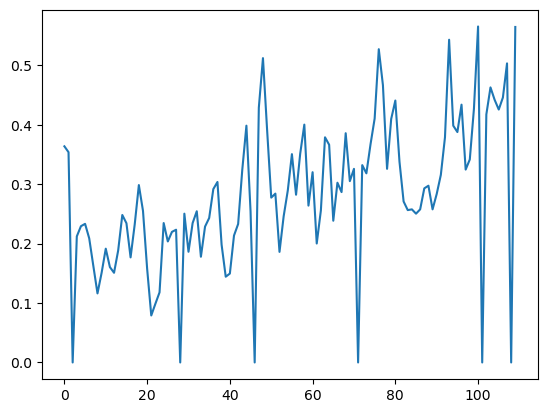

In [20]:
atemp.fillna(0).plot()

<AxesSubplot:>

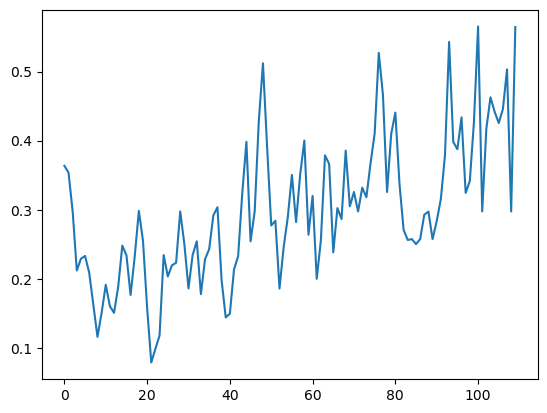

In [21]:
atemp.fillna(0.2975792567307693).plot()

<AxesSubplot:>

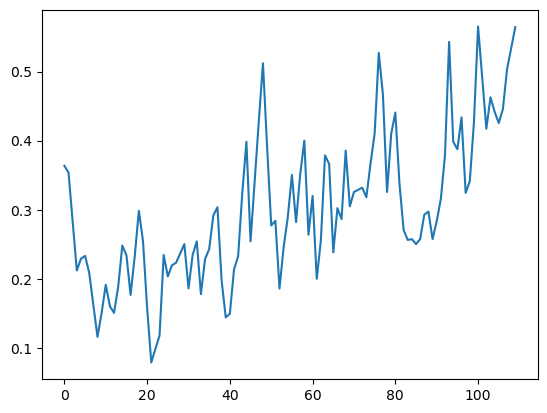

In [22]:
atemp.interpolate(method='linear').plot()

<AxesSubplot:>

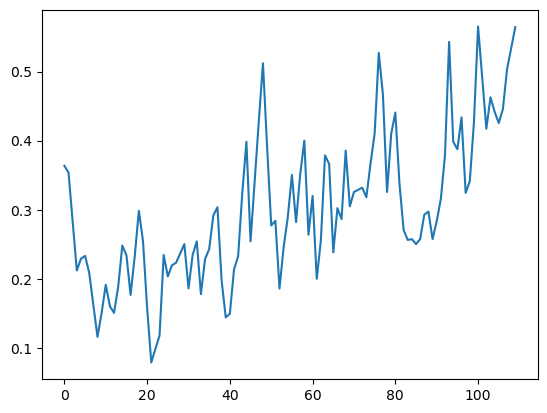

In [23]:
atemp.interpolate(method='slinear').plot()

<AxesSubplot:>

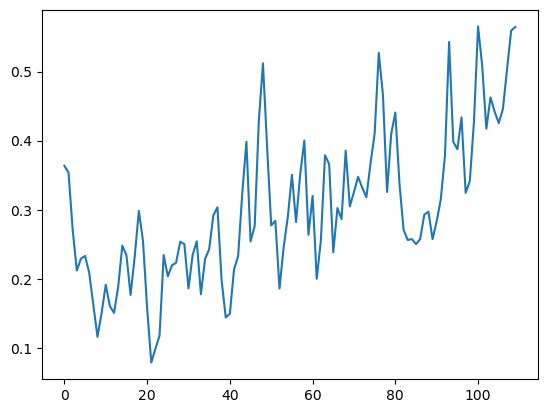

In [24]:
atemp.interpolate(method='cubic').plot()

<AxesSubplot:>

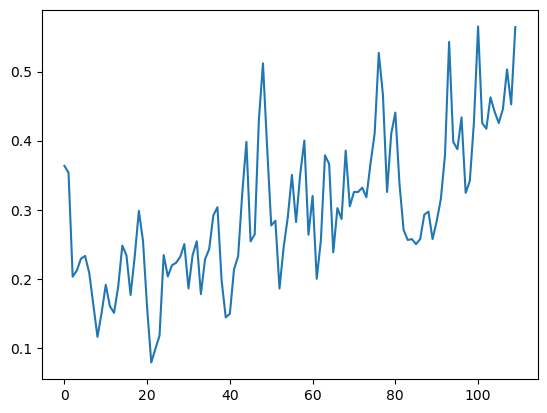

In [25]:
atemp.interpolate(method='spline',order=2).plot()

### 수업시간 외 보간법

<AxesSubplot:>

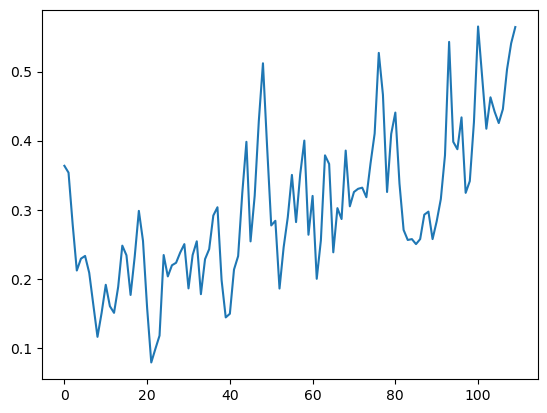

In [26]:
atemp.interpolate(method='pchip',order=2).plot()

<AxesSubplot:>

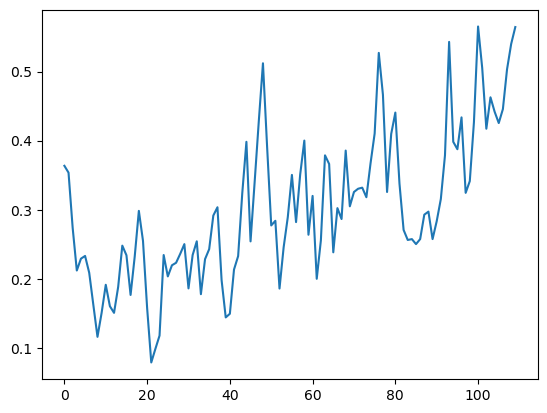

In [27]:
atemp.interpolate(method='akima',order=2).plot()